In [86]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [87]:
#other useful imports 
import numpy as np
import scipy as sp
import scipy.stats as stats
import h5py

from utils import featurewise_norm


### Principal Axes in Data

In [88]:
#generate some random gaussian data
rng = np.random.RandomState(seed=0)
num_points = 200
data_mean = np.array([4, 1])
data_cov = np.array([[2, .9], [.9, 2]])
toy_data = rng.multivariate_normal(mean=data_mean,
                                   cov=data_cov, size=200)

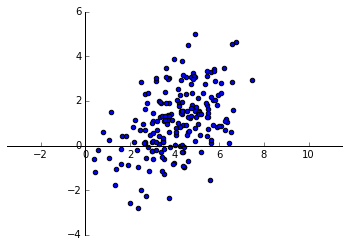

In [89]:
#let's look at the data
plt.scatter(toy_data[:, 0], toy_data[:, 1])
plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

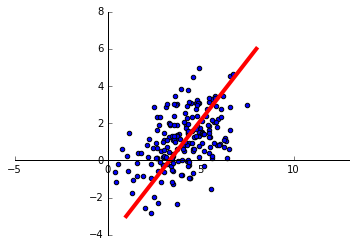

In [90]:
#here's the principle axis also plotted
plt.plot([1, 8], [-3, 6], color='r', linewidth=4)

plt.scatter(toy_data[:, 0], toy_data[:, 1])
plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

#we want to now center the data so that the principal axis is a vector
#that is -- is should go through the origin

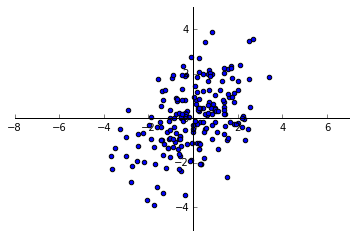

In [91]:
#ok this is the centering function
def center(x):
    return x - x.mean(0)

toy_data_ctr = center(toy_data)
plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])
plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

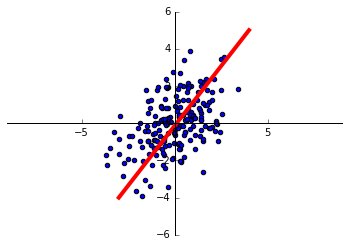

In [92]:
#now the principal axis goes through the origin 
#and is represented by a vector

plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])
plt.plot([1-data_mean[0], 8-data_mean[0]], [-3-data_mean[1], 6-data_mean[1]], color='r', linewidth=4)
plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

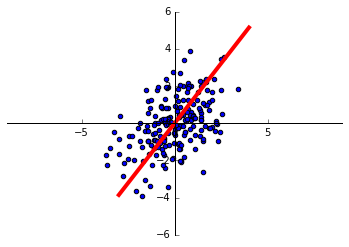

In [93]:
plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])

slope = 9. / 7.
line = lambda x: slope * x
plt.plot([-3, 4], [line(-3), line(4)], color='r', linewidth=4)

plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

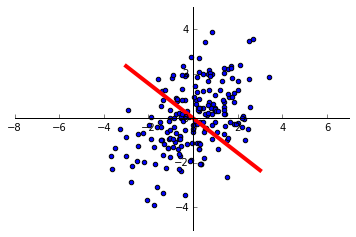

In [94]:
#let's have a look at the hyperplane orthogonal to the principal axis

plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])

orig_slope = 9./7.
slope = - 1. / orig_slope
line = lambda x: slope * x
plt.plot([-3, 3], [line(-3), line(3)], color='r', linewidth=4)

plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

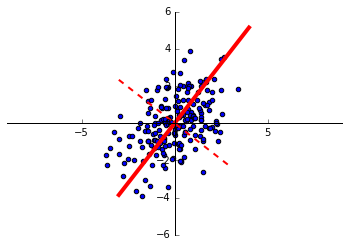

In [95]:
#let's look at the principal axis and the orthogonal hyperplane at the same time

plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])

slope = 9./7.
line = lambda x: slope * x
plt.plot([-3, 4], [line(-3), line(4)], color='r', linewidth=4)

line_perp = lambda x: -(1./slope) * x
plt.plot([-3, 3], [line_perp(-3), line_perp(3)], color='r', linewidth=2, linestyle='--')


plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

In [96]:
#here's a generic function that will plot a chosen axis
#as well as the hyperplane perpendicular to the chosen axis 
#as well as show some residuals from the perpendicular hyperplane 
#for various data points

def plot_axis(data, slope):
    line = lambda x: slope * x

    vec = np.array([1, line(1)])
    dx = np.dot(data, vec) / (np.linalg.norm(vec)**2)
    dy = vec[1] * dx
    xs = data[:, 0] - dx
    ys = data[:, 1] - dy

    plt.scatter(data[:, 0], data[:, 1])

    plt.plot([-3, 4], [line(-3), line(4)], color='r', linewidth=4)

    if slope:
        line_perp = lambda x: -(1./slope) * x 
        plt.plot([-3, 3], [line_perp(-3), line_perp(3)], color='r', linewidth=2, linestyle='--')
    else:
        plt.plot([0, 0], [-3, 3], color='r', linewidth=2, linestyle='--')
    
    for i in range(1, 41, 5):
        x0, y0 = data[i]
        x1 = xs[i]
        y1 = ys[i]
        plt.plot([x0, x1], [y0, y1], color='y', linewidth=3)

    plt.axis('equal')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

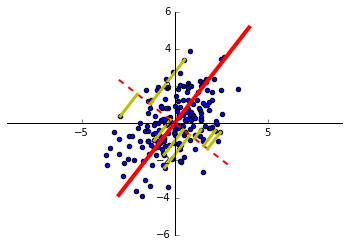

In [97]:
#This is with the slope picking out the correct principal axis
plot_axis(data=toy_data_ctr, slope=9./7.)

In [98]:
#now we care to understand how much variance is absorbed by 
#a given axis

def total_var(data, slope):
    line = lambda x: slope * x
    vec = np.array([1, line(1)])
    dx = np.dot(data, vec) / (np.linalg.norm(vec)**2)
    dy = vec[1] * dx
    diffs = np.sqrt((dx**2 + dy**2))
    return diffs.var()

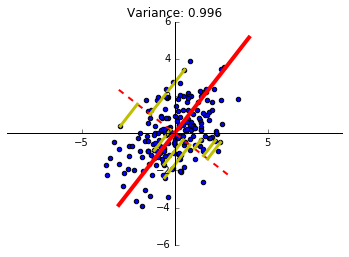

In [99]:
#The correct choice of principal axis absorbs the most variance
slope = 9./7.
plot_axis(toy_data_ctr, slope)
varval = total_var(toy_data_ctr, slope)
plt.title('Variance: %.3f' % varval)

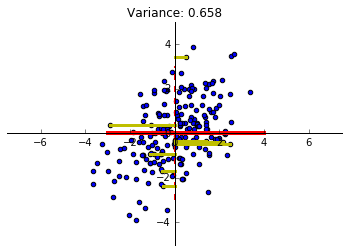

In [100]:
#... while the wrong choice absorbs less
slope = 0
plot_axis(toy_data_ctr, slope)
varval = total_var(toy_data_ctr, slope)
plt.title('Variance: %.3f' % varval)

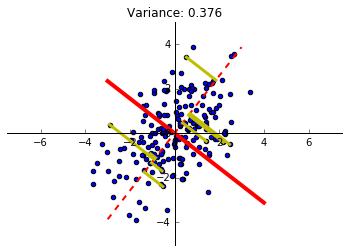

In [101]:
#... in fact picking the choice in the orthogonal hyperplane
#minimizes the absorbed variance

slope = - 1. / (9./7.)
plot_axis(toy_data_ctr, slope)
varval = total_var(toy_data_ctr, slope)
plt.title('Variance: %.3f' % varval)

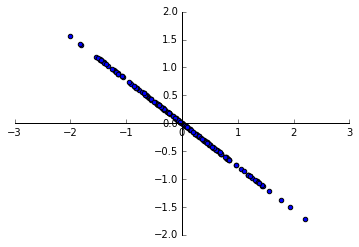

In [102]:
#Method of "deflation" removes all the variance
#along the principal axis and just leaves what's left

slope = 9/7.
line = lambda x: slope * x
vec = np.array([1, line(1)])
proj = np.dot(toy_data_ctr, vec) / (np.linalg.norm(vec)**2)
proj = toy_data_ctr - np.outer(proj, vec)
plt.scatter(proj[:, 0], proj[:, 1])

plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

### The Power Method

In [103]:
#ok let's load our usual data 
DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

In [104]:
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged'][:]
IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS']
V4_NEURONS = Ventral_Dataset['neural_meta']['V4_NEURONS']
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
IT_Neural_Data = Neural_Data[:, IT_NEURONS]

var_level = Ventral_Dataset['image_meta']['variation_level'][:]
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 

objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}


In [105]:
#use numpy recarray object to store metadata 
meta_array = np.core.records.fromarrays(Ventral_Dataset['image_meta'].values(),
                                        names=Ventral_Dataset['image_meta'].keys())

meta_array.dtype

dtype((numpy.record, [(u'category', 'S7'), (u'image_id', 'S40'), (u'object_name', 'S24'), (u'rotation_xy', '<f8'), (u'rotation_xz', '<f8'), (u'rotation_yz', '<f8'), (u'size', '<f8'), (u'translation_y', '<f8'), (u'translation_z', '<f8'), (u'variation_level', 'S2')]))

In [200]:
subset_inds = ((var_level == 'V6') & ((categories == 'Animals') | (categories == 'Boats'))).nonzero()[0]
Neural_Data_subset = IT_Neural_Data[subset_inds] 
Neural_Data_subset, _ig, _ig = featurewise_norm(Neural_Data_subset)

In [201]:
cov = np.dot(Neural_Data_subset.T, Neural_Data_subset)

In [202]:
#number of "feature dimensions" in the dataset
cov.shape

(168, 168)

In [203]:
def norm(v): return v / np.linalg.norm(v)

def power_method(A, n=200):
    #A = our matrix --- square of shape (k, k)
    #n = number of times we want to iterate the power method
    
    #initial guess for eigenvector
    k = A.shape[1]  #number of dimensions
    v = norm(np.random.rand(k))

    #iterate
    for i in range(n):
        #calculate v --> Av
        v = np.dot(A, v)
        #normalize
        v = norm(v)
        
    #compute corresponding eigenvalue
    l = np.dot(v.T, np.dot(A, v)) / np.dot(v, v)

    return l, v
    

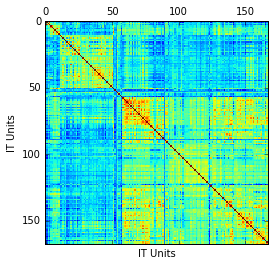

In [204]:
plt.matshow(cov)
plt.xlabel('IT Units')
plt.ylabel("IT Units")

In [205]:
l1, v1 = power_method(cov)

In [206]:
l1

24130.60980887546

In [207]:
test = np.dot(cov, v1)  / v1
test[:100]

array([24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
       24130.60980888, 24130.60980888, 24130.60980888, 24130.60980888,
      

In [208]:
#deflation of taking out the first eigenvector
cov1 = cov - l1 * np.outer(v1.T, v1)

In [209]:
l2, v2 = power_method(cov1)

In [210]:
l2

9291.925325327898

In [211]:
test = np.dot(cov, v2)  / v2
test[:10]

array([9291.92532533, 9291.92532533, 9291.92532533, 9291.92532533,
       9291.92532533, 9291.92532533, 9291.92532533, 9291.92532533,
       9291.92532533, 9291.92532533])

In [212]:
#deflating again
cov2 = cov1 - l2 * np.outer(v2.T, v2)

In [213]:
l3, v3 = power_method(cov2)

In [214]:
l3

5626.255338775673

In [215]:
test = np.dot(cov, v3)  / v3
test[:10]

array([5626.25533878, 5626.25533878, 5626.25533878, 5626.25533878,
       5626.25533878, 5626.25533878, 5626.25533878, 5626.25533878,
       5626.25533878, 5626.25533878])

In [216]:
def get_eigenvalues(A, n=200):
    #A is a square matrix 
    k = A.shape[1]
    vals = []
    vecs = []
    for i in range(k):
        l, v = power_method(A, n=n)   #power method
        vals.append(l); vecs.append(v) 
        A = A - l * np.outer(v.T, v)  #deflation
    return np.array(vals), np.array(vecs).T

In [217]:
eigenvals, eigenvecs = get_eigenvalues(cov)

In [218]:
eigenvecs.shape

(168, 168)

In [219]:
eigenvals_from_numpy, eigenvecs_from_numpy = np.linalg.eig(cov)

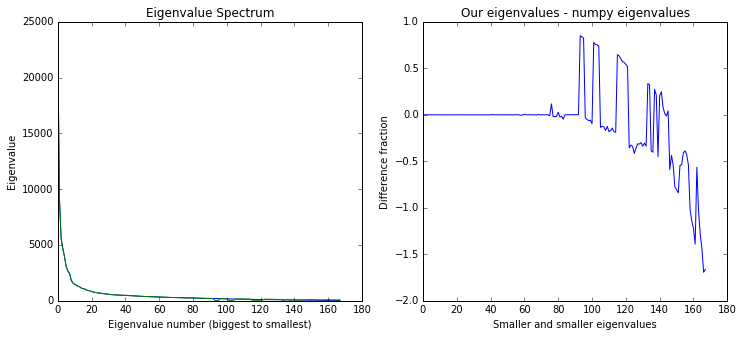

In [220]:
plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.plot(eigenvals)
plt.plot(eigenvals_from_numpy)
plt.ylabel('Eigenvalue')
plt.xlabel('Eigenvalue number (biggest to smallest)')
plt.title('Eigenvalue Spectrum')
plt.subplot(122)
plt.plot((eigenvals - eigenvals_from_numpy) / eigenvals)
plt.xlabel('Smaller and smaller eigenvalues')
plt.title('Our eigenvalues - numpy eigenvalues')
plt.ylabel('Difference fraction')

### Analysis of eigenvectors

In [221]:
eigenvecs[:, 0]

array([-0.01875312, -0.00666673,  0.04423788,  0.01196846,  0.04724284,
        0.05235319,  0.06298953,  0.0693626 ,  0.07179396,  0.05214819,
        0.06626571,  0.02163325,  0.02895311,  0.04880391,  0.03088104,
        0.04783588,  0.00469428,  0.01966164,  0.02006321,  0.03848145,
        0.02658501,  0.01860242,  0.04116905,  0.06018907,  0.02085922,
        0.04384043,  0.02382351,  0.02891102,  0.05715644,  0.05075652,
        0.03915834,  0.041876  ,  0.02311579,  0.04390438,  0.04245059,
        0.05943933,  0.04001265,  0.05387473,  0.03994023,  0.06052189,
        0.04271393,  0.06214562,  0.04457415,  0.03688218,  0.04573565,
        0.01196131,  0.04645392,  0.02741676,  0.05002013,  0.04479448,
        0.05562773,  0.07051532, -0.00850564, -0.00145218,  0.07210349,
        0.03136437,  0.03386903, -0.02224501,  0.09036966,  0.10773622,
        0.12882908,  0.11043357,  0.10037386,  0.11425586,  0.09478191,
        0.0878599 ,  0.09772584,  0.11890529,  0.0862739 ,  0.10

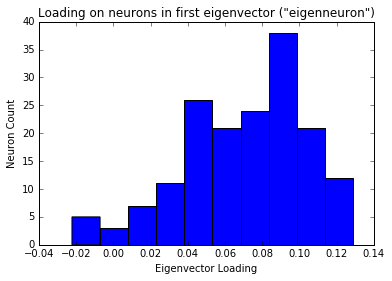

In [222]:
#no one neuron is that important -- because the weightings
#of the neurons in the principal axis are pretty well distributed
plt.hist(eigenvecs[:, 0])
plt.xlabel('Eigenvector Loading')
plt.ylabel("Neuron Count")
plt.title('Loading on neurons in first eigenvector ("eigenneuron")')

In [223]:
#this is sorta  a measure of "interpretability"
stats.kurtosis(eigenvecs[:, 0])

-0.18501405382945002

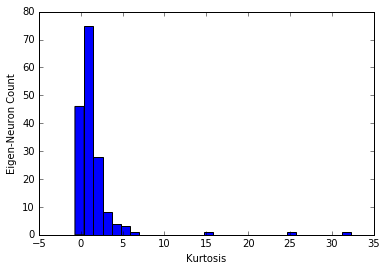

In [224]:
#let's look at loading sparseness for each "eigenneuron"
loading_sparsenesses = np.apply_along_axis(stats.kurtosis, axis=0, arr=eigenvecs)
plt.hist(loading_sparsenesses, bins=30)
plt.xlabel('Kurtosis')
plt.ylabel('Eigen-Neuron Count')
#it looks like we can say:
# 1) most eigenneurons are not that distinguishable from normal distribution (kurtosis = 0)
# 2) a few eigen-neurons are heavily distributed throughout the population (kurtosis < 0)
# 2) but of those that aren't normal-looking, the majority are *more sparse*  (kurtosis > 0)

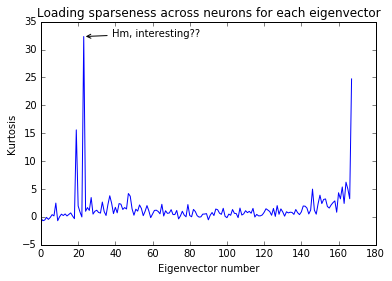

In [225]:
#what about those few very sparse eigenneurons?
plt.plot(loading_sparsenesses)
plt.xlabel('Eigenvector number')
plt.ylabel('Kurtosis')
plt.title('Loading sparseness across neurons for each eigenvector')
argmax = loading_sparsenesses.argmax()
maxval = loading_sparsenesses.max()
plt.annotate('Hm, interesting??', (argmax, maxval), (argmax+15, maxval), 
             arrowprops=dict(arrowstyle='->'))
#looks like eigenneuron 23 is probably driven by one or maybe two neurons!

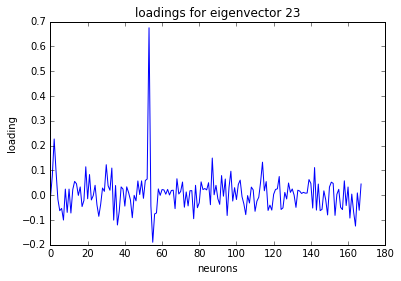

In [226]:
#which neuron(s) are the ones driving the load on eigeennuron 23?
plt.plot(eigenvecs[:, argmax])
plt.xlabel('neurons')
plt.ylabel('loading')
plt.title('loadings for eigenvector %d' % argmax)

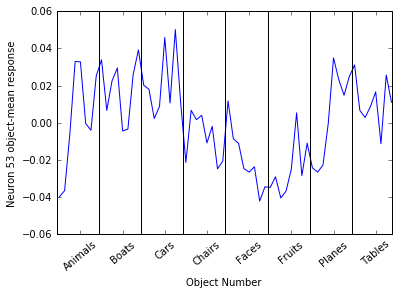

In [227]:
#What does this neuron (53) respond to? 
nind = eigenvecs[:, argmax].argmax()
nd = IT_Neural_Data[:, nind]
sorted_nd = [nd[meta_array['object_name'] == o].mean() for c in unique_categories for o in objects_by_category[c] ]
plt.plot(sorted_nd)
plt.xlabel('Object Number')
plt.ylabel('Neuron %d object-mean response' % nind)
plt.xticks(np.arange(8)*8+4, unique_categories, rotation=40)
[plt.axvline(xv, color='k') for xv in np.arange(8)*8 - 0.5];

#hm --  hard to know... 

#### scree plots

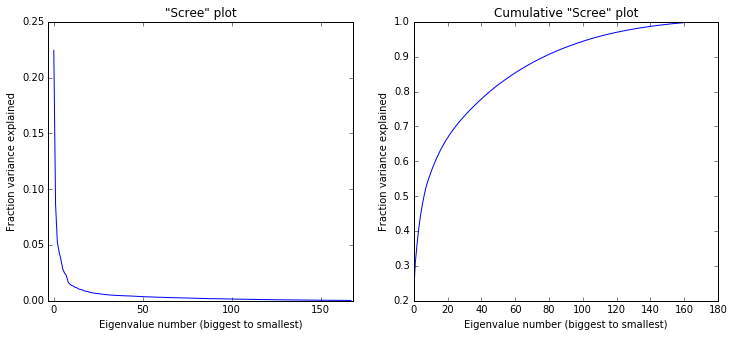

In [228]:
plt.figure(figsize = (12, 5))
plt.subplot(121)
normalized_eigenvals = eigenvals / np.sum(eigenvals)
plt.plot(normalized_eigenvals)
plt.xlim(-3, 168)
plt.ylabel('Fraction variance explained')
plt.xlabel('Eigenvalue number (biggest to smallest)')
plt.title('"Scree" plot')
plt.subplot(122)
plt.plot(normalized_eigenvals.cumsum())
plt.ylabel('Fraction variance explained')
plt.xlabel('Eigenvalue number (biggest to smallest)')
plt.title('Cumulative "Scree" plot')
#conclusion: compared to many typical datasets, this neural dataset
#is very high dimensional (only 60% explained variance in top 20 principal dimensions)

#### compression ratio

In [77]:
Xproj = np.dot(Neural_Data_subset, eigenvecs)

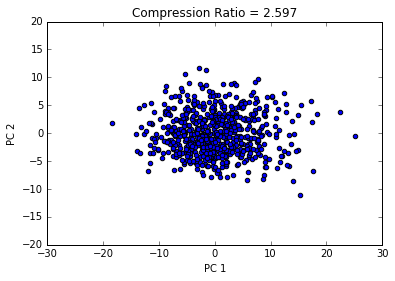

In [80]:
x = Xproj[:, 0]
y = Xproj[:, 1]

plt.scatter(x, y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')

compression_ratio = eigenvals[0] / eigenvals[1]
plt.title("Compression Ratio = %.3f" % compression_ratio)
